In [44]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df1 = pd.read_csv('data/train_transaction.csv')
df2 = pd.read_csv('data/train_identity.csv')
df1.index = df1['TransactionID']
df2.index = df2['TransactionID']

NameError: name 'df' is not defined

In [3]:
del df1['TransactionID']
del df2['TransactionID']

In [4]:
df1.sample(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3231213,0,5793196,159.95,W,17188,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3401643,0,10456186,59.00,W,7919,194.0,150.0,mastercard,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3532019,0,14392667,83.95,W,1407,128.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3246130,0,6212885,107.95,W,2445,381.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101184,0,2222000,26.95,W,12970,NaN,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3426026,0,11125310,58.95,W,6630,267.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3313032,0,8033875,112.14,C,5046,555.0,185.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3500109,0,13441820,226.00,W,8135,247.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3514223,0,13875976,68.95,W,1954,383.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.sample(10)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3573403,-5.0,84086.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,ie 11.0 for desktop,24.0,1366x768,match_status:2,T,F,T,T,desktop,Trident/7.0
3049994,0.0,326440.0,NaN,NaN,7.0,-26.0,NaN,NaN,NaN,NaN,...,chrome 61.0 for android,NaN,NaN,NaN,F,F,T,T,mobile,ONE TOUCH 4016A Build/JDQ39
3418196,-25.0,98214.0,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN
3103524,0.0,106054.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2560x1440,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G890A Build/NRD90M
3410982,-5.0,183732.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome generic,24.0,1280x800,match_status:2,T,F,T,F,mobile,KFDOWI Build/LVY48F
3575227,-5.0,424559.0,0.0,0.0,-2.0,-12.0,NaN,NaN,0.0,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,LG-M700 Build/NMF26X
3570118,-5.0,128070.0,0.0,0.0,0.0,-1.0,NaN,NaN,0.0,0.0,...,firefox 60.0,24.0,1920x1080,match_status:1,T,F,T,F,desktop,Windows
3082197,-5.0,77492.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,2048x1536,match_status:1,T,F,F,F,mobile,iOS Device
3056358,0.0,105732.0,1.0,0.0,1.0,0.0,NaN,NaN,1.0,0.0,...,firefox 52.0,24.0,1366x768,match_status:1,T,T,T,T,desktop,rv:52.0


In [7]:
df = df1.join(df2)

In [10]:
categoricalColumns = df.columns[df.dtypes==object]
numericColumns = df.columns[df.dtypes!=object]

(array([108.,  69.,  19.,   0.,  14.,   1.,   1., 121.,  57.,  12.]),
 array([0.        , 0.09919616, 0.19839232, 0.29758848, 0.39678464,
        0.4959808 , 0.59517696, 0.69437312, 0.79356928, 0.89276544,
        0.99196159]),
 <a list of 10 Patch objects>)

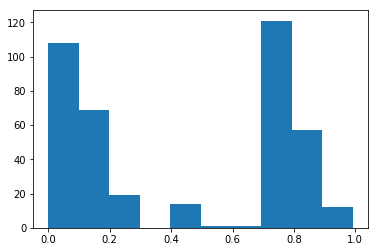

In [11]:
percentNa = df[numericColumns].isna().sum()/ len(df)
plt.hist(percentNa)

In [12]:
lowPercentColumns = numericColumns[percentNa < .3]
midPercentColumns = numericColumns[(percentNa > .3) & (percentNa < .7)]
midAndLowPercentColumns = numericColumns[percentNa < .7]

In [13]:
for column in lowPercentColumns:
    df[column] = df[column].fillna(df[column].mean())

In [14]:
for column in midPercentColumns:
    df["%s_isnan"%column] = df[column].isna()
    df[column] = df[column].fillna(df[column].mean())

(array([212.,   0.,   0.,   0.,   0.,   0.,   0., 121.,  57.,  12.]),
 array([0.        , 0.09919616, 0.19839232, 0.29758848, 0.39678464,
        0.4959808 , 0.59517696, 0.69437312, 0.79356928, 0.89276544,
        0.99196159]),
 <a list of 10 Patch objects>)

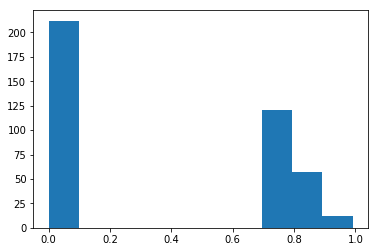

In [15]:
percentNa = df[numericColumns].isna().sum()/ len(df)
plt.hist(percentNa)

In [23]:
categoricalColumnsExceptEmail = categoricalColumns.to_list()
del categoricalColumnsExceptEmail[3:5]

In [24]:
for column in categoricalColumnsExceptEmail:
    df[column] = cleanedCategoricalWithTooManyOptions(df, column)

In [26]:
dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
dfCategoricalExceptEmailDummied.columns

Index(['ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S',
       'ProductCD_W', 'card4_american express', 'card4_discover',
       'card4_mastercard', 'card4_other', 'card4_visa', 'card6_credit',
       'card6_debit', 'card6_other', 'M1_T', 'M1_other', 'M2_F', 'M2_T',
       'M3_F', 'M3_T', 'M4_M0', 'M4_M1', 'M4_M2', 'M5_F', 'M5_T', 'M6_F',
       'M6_T', 'M7_F', 'M7_T', 'M8_F', 'M8_T', 'M9_F', 'M9_T', 'id_12_Found',
       'id_12_NotFound', 'id_15_Found', 'id_15_New', 'id_15_Unknown',
       'id_16_Found', 'id_16_NotFound', 'id_23_other', 'id_27_other',
       'id_28_Found', 'id_28_New', 'id_29_Found', 'id_29_NotFound',
       'id_30_Windows 10', 'id_30_Windows 7', 'id_30_other',
       'id_31_chrome 62.0', 'id_31_chrome 63.0', 'id_31_chrome 64.0',
       'id_31_chrome 65.0', 'id_31_ie 11.0 for desktop',
       'id_31_mobile safari 11.0', 'id_31_mobile safari generic',
       'id_31_other', 'id_31_safari generic', 'id_33_1334x750',
       'id_33_1366x768', 'id_33_1920x1080', 

In [27]:
dfEmails = df[['P_emaildomain', 'R_emaildomain']]

In [28]:
#getEmailService = lambda x: x.split('.', maxsplit=1)[0] if type(x)==str else ''
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)

In [29]:
emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
for column in emailColumns:
    df[column] = cleanedCategoricalWithTooManyOptions(df, column)

In [30]:
dfEmailDummied = pd.get_dummies(df[emailColumns])

In [31]:
dfEmailDummied.columns

Index(['P_emailservice_', 'P_emailservice_anonymous', 'P_emailservice_aol',
       'P_emailservice_comcast', 'P_emailservice_gmail',
       'P_emailservice_hotmail', 'P_emailservice_icloud',
       'P_emailservice_other', 'P_emailservice_yahoo', 'P_emaildomain_',
       'P_emaildomain_com', 'P_emaildomain_net', 'P_emaildomain_other',
       'R_emailservice_', 'R_emailservice_anonymous', 'R_emailservice_gmail',
       'R_emailservice_hotmail', 'R_emailservice_other',
       'R_emailservice_yahoo', 'R_emaildomain_', 'R_emaildomain_com',
       'R_emaildomain_other'],
      dtype='object')

In [39]:
print(dfEmailDummied.shape)
print(dfCategoricalExceptEmailDummied.shape)
print(df[midAndLowPercentColumns].shape)

(590540, 22)
(590540, 79)
(590540, 212)


In [40]:
df_concat = pd.concat([df[midAndLowPercentColumns], dfEmailDummied, dfCategoricalExceptEmailDummied], axis=1)

In [45]:
with open('dataframe.pd', 'wb') as f:
    pickle.dump(df_concat, f)